In [1]:
from citipy import citipy
import json
import requests
import matplotlib.pyplot as plt
import pandas as pd
from api_keys import weather_api_key
import random
from datetime import datetime
import scipy.stats as sts

In [2]:
range_lat = (-90.00, 90.00)
range_lng = (-180.00, 180.00)

city_dict = {}

# random.seed(0)

i = 1
ran_length = random.randint(500,600)

while len(city_dict) < ran_length: # change this after script completion for ran_length
    rand_lat = round(random.uniform(range_lat[0], range_lat[1]), 2)
    rand_lng = round(random.uniform(range_lng[0], range_lng[1]), 2)
    
    city = citipy.nearest_city(rand_lat, rand_lng)
    
    if city.city_name in city_dict:
        pass
    else:
        city_dict[city.city_name] = (i, city.country_code, rand_lat, rand_lng)
        i += 1    

# city_dict

In [3]:
url_base = "http://api.openweathermap.org/data/2.5/weather?"

weather_dict = {}

city = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date_unix = []
date = []
city_na = []
for key in city_dict:
    
    url_query = f"{url_base}q={key}&appid={weather_api_key}&units=metric"
    
    request = requests.get(url_query)
    weather_dict[key] = (request.json())
    
    try:
        city.append(weather_dict[key]["name"])
        lat.append(float(weather_dict[key]["coord"]["lat"]))
        lng.append(float(weather_dict[key]["coord"]["lat"]))
        max_temp.append(float(weather_dict[key]["main"]["temp_max"]))
        humidity.append(float(weather_dict[key]["main"]["humidity"]))
        cloudiness.append(int(weather_dict[key]["clouds"]["all"]))
        wind_speed.append(float(weather_dict[key]["wind"]["speed"]))
        country.append(weather_dict[key]["sys"]["country"])
        date_unix.append(int(weather_dict[key]["dt"]))
        date.append(datetime.utcfromtimestamp(int(weather_dict[key]["dt"])).strftime('%Y-%m-%d %H:%M:%S'))
        print(f"Request {str(city_dict[key][0]).rjust(3, '0')} of {len(city_dict)} | AVAILABLE:     COMPLETE [{request}] ---> {key}")
        
    except KeyError:
        city_na.append(key)
        print(f"Request {str(city_dict[key][0]).rjust(3, '0')} of {len(city_dict)} | NOT AVAILABLE: COMPLETE [{request}] ---> {key}")

Request 001 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> vilyuysk
Request 002 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> tessalit
Request 003 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> tiksi
Request 004 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> avarua
Request 005 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> puerto padre
Request 006 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> kapaa
Request 007 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> pevek
Request 008 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> atuona
Request 009 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> talnakh
Request 010 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> okhotsk
Request 011 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> albany
Request 012 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> tauranga
Request 013 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> jamestow

Request 106 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> maceio
Request 107 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> general roca
Request 108 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> talara
Request 109 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> luganville
Request 110 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> susehri
Request 111 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> leo
Request 112 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> nelson bay
Request 113 of 516 | NOT AVAILABLE: COMPLETE [<Response [404]>] ---> bargal
Request 114 of 516 | NOT AVAILABLE: COMPLETE [<Response [404]>] ---> labutta
Request 115 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> cabo san lucas
Request 116 of 516 | NOT AVAILABLE: COMPLETE [<Response [404]>] ---> amderma
Request 117 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> presidencia roque saenz pena
Request 118 of 516 | AVAILABLE:     COMPLETE

Request 211 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> cap malheureux
Request 212 of 516 | NOT AVAILABLE: COMPLETE [<Response [404]>] ---> sentyabrskiy
Request 213 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> ilulissat
Request 214 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> rezina
Request 215 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> kavaratti
Request 216 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> atbasar
Request 217 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> airai
Request 218 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> cherskiy
Request 219 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> kaduqli
Request 220 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> pedasi
Request 221 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> bandarbeyla
Request 222 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> severomuysk
Request 223 of 516 | AVAILABLE:     COMPLETE [<Response

Request 316 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> kashi
Request 317 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> plainview
Request 318 of 516 | NOT AVAILABLE: COMPLETE [<Response [404]>] ---> bolungarvik
Request 319 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> kamenka
Request 320 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> sabang
Request 321 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> nyandoma
Request 322 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> saint-leu
Request 323 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> puerto carreno
Request 324 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> mackay
Request 325 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> ligayan
Request 326 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> palu
Request 327 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> galesong
Request 328 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] --

Request 421 of 516 | NOT AVAILABLE: COMPLETE [<Response [404]>] ---> formoso do araguaia
Request 422 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> coquimbo
Request 423 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> jacqueville
Request 424 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> prado
Request 425 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> zonguldak
Request 426 of 516 | NOT AVAILABLE: COMPLETE [<Response [404]>] ---> babanusah
Request 427 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> tamarin
Request 428 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> gazanjyk
Request 429 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> ewo
Request 430 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> bathsheba
Request 431 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> eyl
Request 432 of 516 | AVAILABLE:     COMPLETE [<Response [200]>] ---> athabasca
Request 433 of 516 | AVAILABLE:     COMPLETE [<Response [200

In [4]:
# Cities not found in OpenWeatherAPI
len_cities_na = len(city_na)

if len_cities_na == 0:
    print(f"All cities found in the OpenWeather database")
else:
    if len_cities_na == 1:
        print(f"The following city was not found in the OpenWeather database:\n")
    else:
        print(f"The following {len_cities_na} cities were not found in the OpenWeather database:\n")
    for index, element in enumerate(city_na):
        print(f"{index+1}.- {element}")

The following 43 cities were not found in the OpenWeather database:

1.- illoqqortoormiut
2.- nizhneyansk
3.- taolanaro
4.- vaitupu
5.- lolua
6.- belushya guba
7.- bargal
8.- labutta
9.- amderma
10.- tsihombe
11.- grand river south east
12.- zlatoustovsk
13.- doctor pedro p. pena
14.- kuche
15.- sentyabrskiy
16.- barentsburg
17.- louisbourg
18.- umzimvubu
19.- attawapiskat
20.- teneguiban
21.- khonsar
22.- gulshat
23.- pilao arcado
24.- toliary
25.- monte cristi
26.- haibowan
27.- bolungarvik
28.- mullaitivu
29.- karkaralinsk
30.- warqla
31.- armacao dos buzios
32.- yefira
33.- shkotovo-26
34.- mys shmidta
35.- saleaula
36.- jiddah
37.- formoso do araguaia
38.- babanusah
39.- zachagansk
40.- wulanhaote
41.- ambodifototra
42.- grand centre
43.- westpunt


In [5]:
city_df = pd.DataFrame({
    "City": city,
    "Latitude": lat,
    "Longitude": lng,
    "Max. Temperature (C)": max_temp,
    "Humidity (%)": humidity,
    "Cloudiness (%)": cloudiness,
    "Wind Speed (m/s)": wind_speed,
    "Country": country,
    "Date (unix-UTC)": date_unix,
    "Date": date
})

study_date = city_df["Date"][0][0:10]

# Saving the df as a csv
city_df.to_csv("city_df.csv", encoding = "utf-8", index = False)
city_df

,City,Latitude,Longitude,Max. Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Country,Date (unix-UTC),Date
0,Vilyuysk,63.7553,63.7553,1.61,83.0,91,3.59,RU,1634963674,2021-10-23 04:34:34
1,Tessalit,20.1986,20.1986,25.23,23.0,15,2.81,ML,1634963676,2021-10-23 04:34:36
2,Tiksi,71.6872,71.6872,-15.27,97.0,100,1.03,RU,1634963677,2021-10-23 04:34:37
3,Avarua,-21.2078,-21.2078,22.03,64.0,20,2.57,CK,1634963679,2021-10-23 04:34:39
4,Puerto Padre,21.1950,21.1950,25.56,91.0,98,1.06,CU,1634963680,2021-10-23 04:34:40
...,...,...,...,...,...,...,...,...,...,...
468,Nkhata Bay,-11.6066,-11.6066,26.53,55.0,7,0.97,MW,1634964167,2021-10-23 04:42:47
469,Departamento de Maldonado,-34.6667,-34.6667,14.66,98.0,100,2.26,UY,1634964169,2021-10-23 04:42:49
470,Jieshi,22.8134,22.8134,21.64,65.0,62,4.35,CN,1634964171,2021-10-23 04:42:51
471,Skibbereen,51.5500,51.5500,11.89,79.0,100,8.24,IE,1634964171,2021-10-23 04:42:51


In [6]:
# Statistics of the DataFrame
summary_sts = city_df.describe()
summary_sts


,Latitude,Longitude,Max. Temperature (C),Humidity (%),Cloudiness (%),Wind Speed (m/s),Date (unix-UTC)
count,473.000000,473.000000,473.000000,473.000000,473.000000,473.000000,4.730000e+02
mean,19.414997,19.414997,15.566131,71.892178,57.623679,3.668562,1.634964e+09
std,33.976806,33.976806,11.536338,19.492366,38.723625,2.683425,1.657862e+02
min,-54.800000,-54.800000,-24.800000,1.000000,0.000000,0.000000,1.634963e+09
25%,-8.990300,-8.990300,7.150000,61.000000,19.000000,1.540000,1.634964e+09
50%,22.813400,22.813400,16.610000,75.000000,74.000000,3.090000,1.634964e+09
75%,48.005600,48.005600,25.190000,87.000000,96.000000,5.200000,1.634964e+09
max,78.218600,78.218600,38.080000,100.000000,100.000000,14.400000,1.634964e+09


In [7]:
# Removing cities where the humidity > 100%

if len(city_df["City"][city_df["Humidity (%)"] > 100]) != 0:
    print(f"The following city/cities was/were removed:\n")
    print(city_df["City"][city_df["Humidity (%)"] > 100])
    city_df = city_df.drop(city_df[city_df["Humidity (%)"] > 100].index).reset_index(drop = True)
else:
    print("Humidity inpsection successfully passed.")


Humidity inpsection successfully passed.


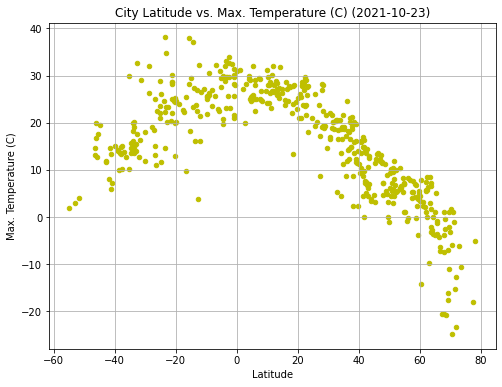

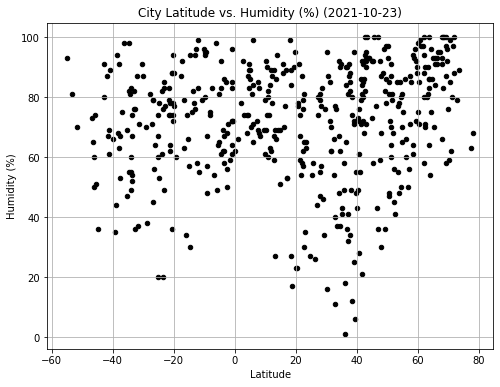

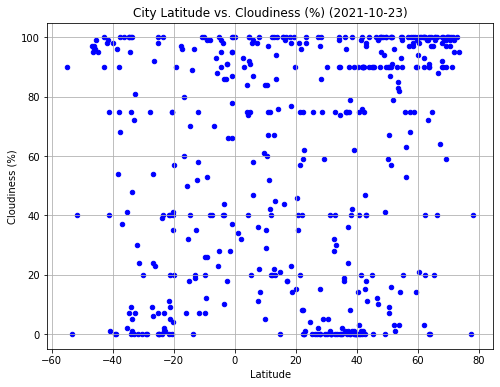

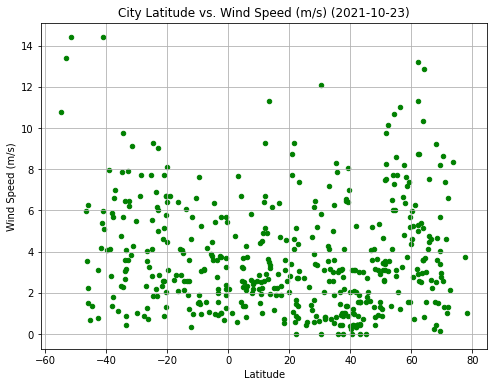

In [8]:
plot_labels = ["Max. Temperature (C)", "Humidity (%)", "Cloudiness (%)", "Wind Speed (m/s)"]
for_figures = ["MaxTemp", "Humidity", "Cloudiness", "WindSpeed"]
colours = ["y", "k", "b", "g"]

for i, label in enumerate(plot_labels):
    city_df.plot.scatter(x = "Latitude", y = label, c = colours[i], title = f"City Latitude vs. {label} ({study_date})", figsize = (8, 6),  grid = True)
    name_fig = f"Figures/Latitude_{for_figures[i]}.png"
    plt.savefig(name_fig, bbox_inches='tight', dpi = 100)
    plt.show()

# Description of the 4 plots here

In [9]:
# Separating cities by their locations either in the Northern Hemisphere (>= 0 degrees latitude) or
# Southern Hemisphere (< 0 degrees latitude)

city_df_NH = city_df[city_df["Latitude"] >= 0].reset_index(drop = True).copy()
city_df_SH = city_df[city_df["Latitude"] < 0].reset_index(drop = True).copy()

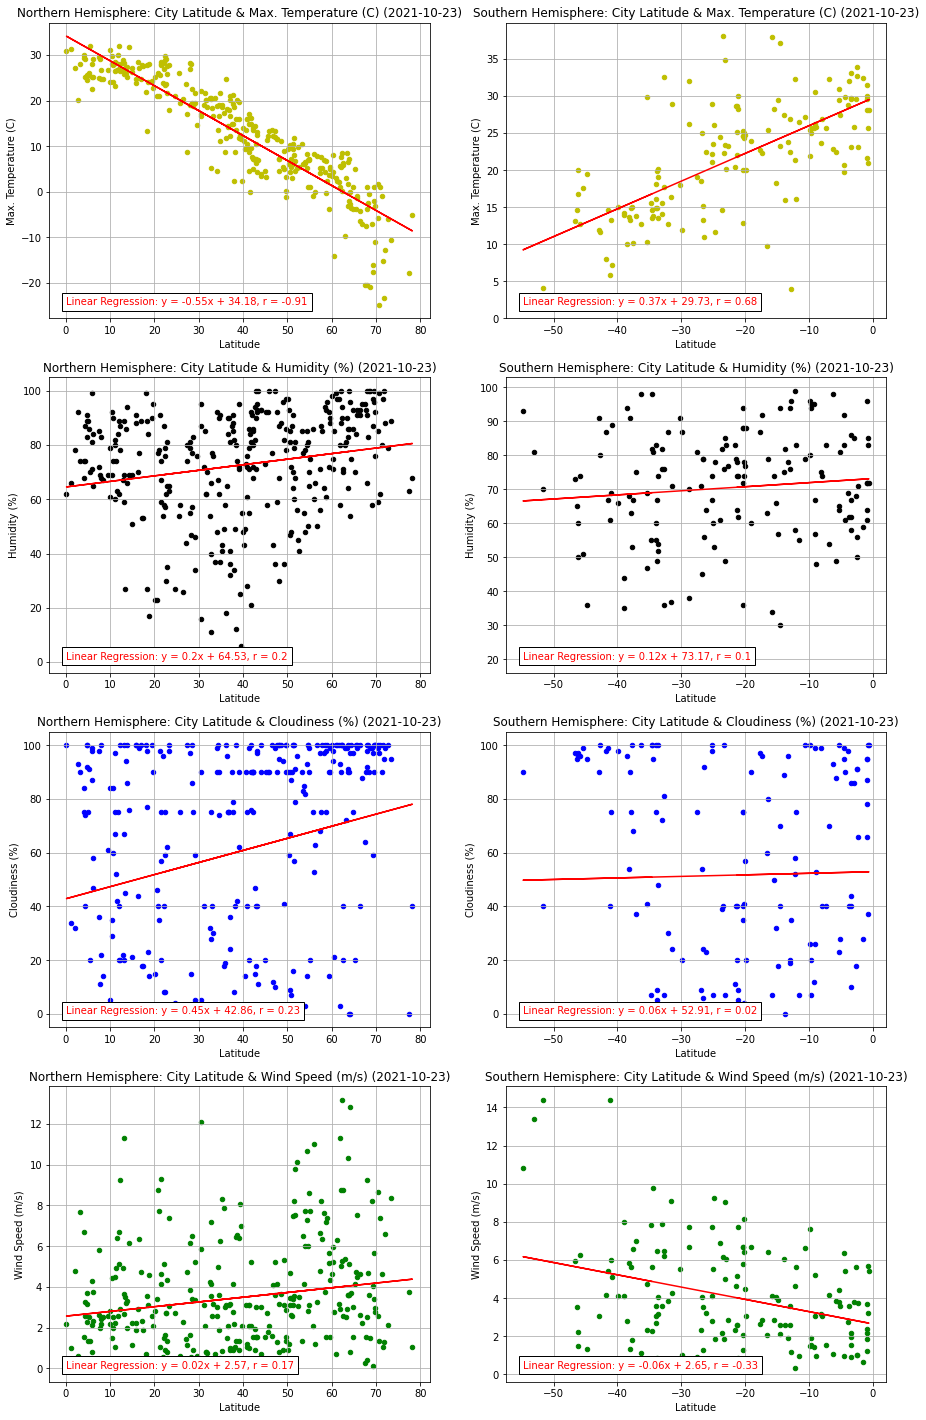

In [24]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize=(15,25))

slope_NH = []
intercept_NH = []
rvalue_NH = []
pvalue_NH = []
stderr_NH = []
regress_values_NH = []
slope_SH = []
intercept_SH = []
rvalue_SH = []
pvalue_SH = []
stderr_SH = []
regress_values_SH = []

for i, label in enumerate(plot_labels):
    
#     Performing linear regression for the Northern Hemisphere and storing the values in lists
    (slope, intercept, rvalue, pvalue, stderr) = sts.linregress(city_df_NH["Latitude"], city_df_NH[label])
    slope_NH.append(slope)
    intercept_NH.append(intercept)
    rvalue_NH.append(rvalue)
    pvalue_NH.append(pvalue)
    stderr_NH.append(stderr)
    
    line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    r_val = f"r = {round(rvalue,2)}"
    regress_values = city_df_NH["Latitude"] * slope + intercept
    regress_values_NH.append(regress_values)
    
    city_df_NH.plot.scatter(ax = axes[i, 0], x = "Latitude", y = label, c = colours[i], title = f"Northern Hemisphere: City Latitude & {label} ({study_date})", grid = True)
    axes[i,0].plot(city_df_NH["Latitude"],regress_values,"r-")
    axes[i,0].annotate(f"Linear Regression: {line_eq}, {r_val}", (city_df_NH["Latitude"].min(), city_df_NH[label].min()), fontsize=10,color="r", bbox=dict(facecolor='white', edgecolor='k'))
    
#     Performing linear regression for the Southern Hemisphere and storing the values in lists
    (slope, intercept, rvalue, pvalue, stderr) = sts.linregress(city_df_SH["Latitude"], city_df_SH[label])
    slope_SH.append(slope)
    intercept_SH.append(intercept)
    rvalue_SH.append(rvalue)
    pvalue_SH.append(pvalue)
    stderr_SH.append(stderr)
    
    line_eq = f"y = {str(round(slope,2))}x + {str(round(intercept,2))}"
    r_val = f"r = {round(rvalue,2)}"
    regress_values = city_df_SH["Latitude"] * slope + intercept
    regress_values_SH.append(regress_values)
    
    city_df_SH.plot.scatter(ax = axes[i, 1], x = "Latitude", y = label, c = colours[i], title = f"Southern Hemisphere: City Latitude & {label} ({study_date})", grid = True)
    axes[i,1].plot(city_df_SH["Latitude"],regress_values,"r-")
    axes[i,1].annotate(f"Linear Regression: {line_eq}, {r_val}", (city_df_SH["Latitude"].min(), city_df_SH[label].min()), fontsize=10,color="r",  bbox=dict(facecolor='white', edgecolor='k'))

plt.savefig("Figures/Complete_Analysis.png", bbox_inches='tight', dpi = 100)